# Simpson's rule

In [143]:
import sympy as sp
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.integrate
from sympy import Eq,symbols
from numpy.testing import assert_almost_equal

In [2]:
a,b,c,x,y = symbols("a,b,c,x,y")

In [3]:
eq_y = Eq(y,a*x**2+b*x+c)

In [4]:
eq_y

Eq(y, a*x**2 + b*x + c)

## Fit curve

In [5]:
y_0,y_1,y_2 = symbols("y_0,y_1,y_2")
x_0,x_1,x_2 = symbols("x_0,x_1,x_2")
d = symbols("d")


In [6]:
eq_y0 = eq_y.subs([(y,y_0),(x,x_0)])
eq_y1 = eq_y.subs([(y,y_1),(x,x_1)])
eq_y2 = eq_y.subs([(y,y_2),(x,x_2)])

In [7]:
eqs=(eq_y0,eq_y1,eq_y2)
solution = sp.solve(eqs,a,b,c)

In [8]:
solution[a]

(-x_0*y_1 + x_0*y_2 + x_1*y_0 - x_1*y_2 - x_2*y_0 + x_2*y_1)/(x_0**2*x_1 - x_0**2*x_2 - x_0*x_1**2 + x_0*x_2**2 + x_1**2*x_2 - x_1*x_2**2)

In [9]:
eq_x0 = Eq(x_0,0)
eq_x1 = Eq(x_1,d)
eq_x2 = Eq(x_2,2*d)

In [10]:
display(eq_x0)
display(eq_x1)
display(eq_x2)


Eq(x_0, 0)

Eq(x_1, d)

Eq(x_2, 2*d)

In [11]:
eqs=(eq_y0,eq_y1,eq_y2,eq_x0,eq_x1,eq_x2)
solution2 = sp.solve(eqs,a,b,c,x_0,x_1,x_2, dict=True)[0]

In [12]:
eq_c = Eq(c,solution2[c])
eq_c

Eq(c, y_0)

In [13]:
eq_b = Eq(b,solution2[b])
eq_b

Eq(b, -(3*y_0 - 4*y_1 + y_2)/(2*d))

In [14]:
eq_a = Eq(a,solution2[a])
eq_a

Eq(a, (y_0 - 2*y_1 + y_2)/(2*d**2))

In [15]:
eqs=(eq_y,eq_y0,eq_y1,eq_y2,eq_x0,eq_x1,eq_x2)
solution3 = sp.solve(eqs,a,b,c,x_0,x_1,x_2,y, dict=True)[0]

In [16]:
eq_y_fit = Eq(y,solution3[y])
eq_y_fit

Eq(y, (2*d**2*y_0 - 3*d*x*y_0 + 4*d*x*y_1 - d*x*y_2 + x**2*y_0 - 2*x**2*y_1 + x**2*y_2)/(2*d**2))

In [17]:
lambda_y_fit = sp.lambdify(list(eq_y_fit.rhs.free_symbols), eq_y_fit.rhs)
lambda_y_fit

<function _lambdifygenerated(y_0, y_1, d, x, y_2)>

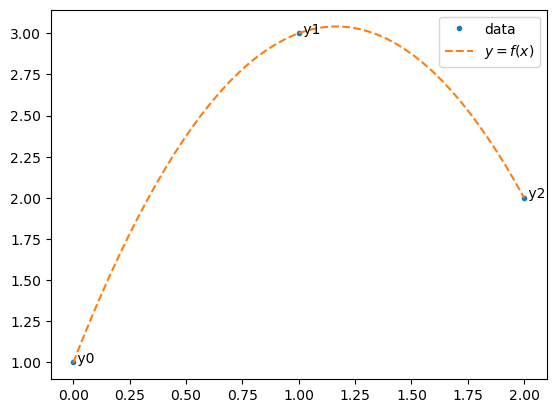

In [18]:
ys = np.array([1,3,2])
xs = np.array([0,1,2])
d_ = xs[1]-xs[0]
x_fit = np.linspace(xs[0],xs[-1],50)
y_fit = lambda_y_fit(x=x_fit, d=d_, y_0=ys[0], y_1=ys[1], y_2=ys[2])

fig,ax=plt.subplots()
ax.plot(xs,ys,'.',label='data')
ax.plot(x_fit,y_fit,'--', label=r'$y=f(x)$')
for i,x_ in enumerate(xs):
    ax.text(x=xs[i], y=ys[i], s=f" y{i}")
ax.legend();


## Area

In [19]:
A = symbols("A")
eq_A_ = Eq(A,sp.Integral(eq_y.rhs, (x,0,2*d)))
eq_A_

Eq(A, Integral(a*x**2 + b*x + c, (x, 0, 2*d)))

In [20]:
eq_A = eq_A_.doit()
eq_A

Eq(A, 8*a*d**3/3 + 2*b*d**2 + 2*c*d)

In [21]:
eqs = (eq_A, eq_a, eq_b, eq_c)
solution4 = sp.solve(eqs, A, a, b, c)
eq_A_y = Eq(A,sp.factor(solution4[A]))
eq_A_y

Eq(A, d*(y_0 + 4*y_1 + y_2)/3)

In [22]:
C=symbols("C")
eq_C = sp.Eq(C,2*d/3)
eq_C

Eq(C, 2*d/3)

In [34]:
eq_A_y_C = Eq(A,sp.factor(sp.solve([eq_A_y,eq_C],A,d)[A]))
eq_A_y_C

Eq(A, C*(y_0 + 4*y_1 + y_2)/2)

In [23]:
lambda_A = sp.lambdify(list(eq_A_y.rhs.free_symbols), eq_A_y.rhs)
lambda_A

<function _lambdifygenerated(d, y_0, y_2, y_1)>

In [ ]:
area = lambda_A(d=d_, y_0=ys[0], y_1=ys[1], y_2=ys[2])
area

5.0

In [75]:
scipy.integrate.trapezoid(y=ys,x=xs)

4.5

In [ ]:
d_*(1/2*ys[0]+ys[1]+1/2*ys[2])

4.5

In [76]:
scipy.integrate.simpson(y=ys,x=xs)

5.0

In [35]:
y_3,y_4 = symbols("y_3,y_4")
A_0,A_1 = symbols("A_0,A_1")

eq_A_y0 = eq_A_y_C.subs([
    (A,A_0),])

eq_A_y1 = eq_A_y_C.subs([
    (A,A_1),
    (y_1,y_3),
    (y_2,y_4),
    (y_0,y_2),
])

display(eq_A_y0)
display(eq_A_y1)


Eq(A_0, C*(y_0 + 4*y_1 + y_2)/2)

Eq(A_1, C*(y_2 + 4*y_3 + y_4)/2)

In [36]:
eq_A_tot_ = Eq(A,A_0+A_1)
eq_A_tot_

Eq(A, A_0 + A_1)

In [37]:
eq_A_tot = sp.simplify(eq_A_tot_.subs([
    (A_0,eq_A_y0.rhs),
    (A_1,eq_A_y1.rhs),
]))
eq_A_tot

Eq(A, C*(y_0 + 4*y_1 + 2*y_2 + 4*y_3 + y_4)/2)

In [128]:
def simpson_multipliers(y):
    
    N = len(y)
    assert len(y) >= 3, "At least three points must exist for simsons integration"
    assert N%2==1, "There must be an uneven number of stations for this simple rule to hold"
    n = int(np.floor(N/2))
    multipliers = 0.5*np.ones(N)
    multipliers[0:2*n] = np.tile([1.0,2.0],n)
    multipliers[0]=0.5
    multipliers[-1]=0.5
        
    return multipliers
    

In [130]:
simpson_multipliers(ys)

array([0.5, 2. , 0.5])

In [131]:
def simpson_table(y):
    
    df = pd.DataFrame()
    df['y'] = y
    df['S/M'] = simpson_multipliers(y=y)
    df['product'] = df['y']*df['S/M']
    
    return df
    

In [132]:
simpson_table(ys)

,y,S/M,product
0,1,0.5,0.5
1,3,2.0,6.0
2,2,0.5,1.0


In [145]:
def simpson(y,d:float):
       
    df = simpson_table(y)
    integral = 2/3*d*df['product'].sum()
    return integral

In [146]:
simpson(y=ys,d=d_)

5.0

In [147]:
ys_ = np.random.rand(101)
assert_almost_equal(simpson(y=ys_, d=d_), scipy.integrate.simpson(ys_,dx=d_))